In [62]:
import numpy as np
import scipy
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [2]:
Hotel_Bookings = pd.read_csv("../hotel_bookings.csv")
Hotel_Bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
Hotel_Bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [4]:
Hotel_Bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


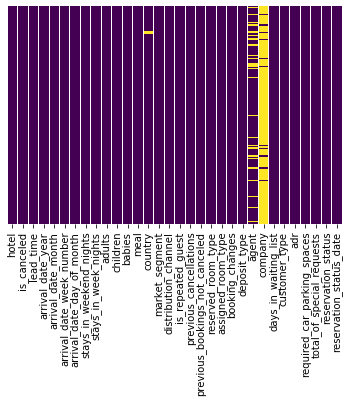

In [5]:
## missing data 

sns.heatmap(Hotel_Bookings.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## roughly 25% of agent data is missing, almost all of company data is missing 
# check country 

In [6]:
Hotel_Bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

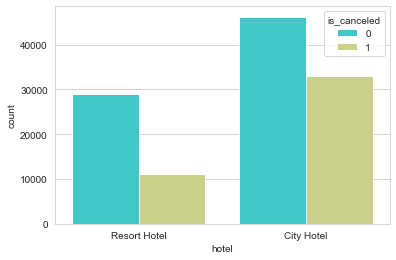

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='hotel', hue = 'is_canceled', data=Hotel_Bookings,palette='rainbow')

In [8]:
###Dropping Null Columns
Hotel_Bookings.drop(['company'],axis=1,inplace=True)
Hotel_Bookings.drop(['agent'],axis=1,inplace=True)

In [9]:
## Converting Categorical Features 
## Changed all categorial features, mapped to a dictionary 

###Convert Hotel
d = {'Resort Hotel': 1, 'City Hotel':2 }
Hotel_Bookings.hotel = Hotel_Bookings.hotel.map(d, na_action='ignore')

In [10]:
###Convert arrival_date_month
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October': 10, 'November': 11, 'December': 12 }
Hotel_Bookings.arrival_date_month = Hotel_Bookings.arrival_date_month.map(d, na_action='ignore')

In [11]:
###Convert Meal
Hotel_Bookings.meal.unique()

d = {'BB':1, 'FB':2, 'HB':3, 'SC':4, 'Undefined':5 }
Hotel_Bookings.meal = Hotel_Bookings.meal.map(d, na_action='ignore')

In [12]:
###Convert Country
Hotel_Bookings.country.unique()

d = {'PRT':1, 'GBR':2, 'USA':3, 'ESP':4, 'IRL':5, 'FRA':6, 'ROU':7, 'NOR':8, 'OMN':9,
       'ARG':10, 'POL':11, 'DEU':12, 'BEL':13, 'CHE':14, 'CN':15, 'GRC':16, 'ITA':17, 'NLD':18,
       'DNK':19, 'RUS':20, 'SWE':21, 'AUS':22, 'EST':23, 'CZE':24, 'BRA':25, 'FIN':26, 'MOZ':27,
       'BWA':28, 'LUX':29, 'SVN':30, 'ALB':31, 'IND':32, 'CHN':33, 'MEX':34, 'MAR':35, 'UKR':36,
       'SMR':37, 'LVA':38, 'PRI':39, 'SRB':40, 'CHL':41, 'AUT':42, 'BLR':43, 'LTU':44, 'TUR':45,
       'ZAF':46, 'AGO':47, 'ISR':48, 'CYM':49, 'ZMB':50, 'CPV':51, 'ZWE':52, 'DZA':53, 'KOR':54,
       'CRI':55, 'HUN':56, 'ARE':57, 'TUN':58, 'JAM':59, 'HRV':60, 'HKG':61, 'IRN':62, 'GEO':63,
       'AND':64, 'GIB':65, 'URY':66, 'JEY':67, 'CAF':68, 'CYP':69, 'COL':70, 'GGY':71, 'KWT':72,
       'NGA':73, 'MDV':74, 'VEN':75, 'SVK':76, 'FJI':77, 'KAZ':78, 'PAK':79, 'IDN':80, 'LBN':81,
       'PHL':82, 'SEN':83, 'SYC':84, 'AZE':85, 'BHR':86, 'NZL':87, 'THA':88, 'DOM':89, 'MKD':90,
       'MYS':91, 'ARM':92, 'JPN':93, 'LKA':94, 'CUB':95, 'CMR':96, 'BIH':97, 'MUS':98, 'COM':99,
       'SUR':100, 'UGA':101, 'BGR':102, 'CIV':103, 'JOR':104, 'SYR':105, 'SGP':106, 'BDI':107, 'SAU':108,
       'VNM':109, 'PLW':110, 'QAT':111, 'EGY':112, 'PER':113, 'MLT':114, 'MWI':115, 'ECU':116, 'MDG':117,
       'ISL':118, 'UZB':119, 'NPL':120, 'BHS':121, 'MAC':122, 'TGO':123, 'TWN':124, 'DJI':125, 'STP':126,
       'KNA':127, 'ETH':128, 'IRQ':129, 'HND':130, 'RWA':131, 'KHM':132, 'MCO':133, 'BGD':134, 'IMN':135,
       'TJK':136, 'NIC':137, 'BEN':138, 'VGB':139, 'TZA':140, 'GAB':141, 'GHA':142, 'TMP':143, 'GLP':144,
       'KEN':145, 'LIE':146, 'GNB':147, 'MNE':148, 'UMI':149, 'MYT':150, 'FRO':151, 'MMR':152, 'PAN':153,
       'BFA':154, 'LBY':155, 'MLI':156, 'NAM':157, 'BOL':158, 'PRY':159, 'BRB':160, 'ABW':161, 'AIA':162,
       'SLV':163, 'DMA':164, 'PYF':165, 'GUY':166, 'LCA':167, 'ATA':168, 'GTM':169, 'ASM':170, 'MRT':171,
       'NCL':172, 'KIR':173, 'SDN':174, 'ATF':175, 'SLE':176, 'LAO':177 }

Hotel_Bookings.country = Hotel_Bookings.country.map(d, na_action='ignore')

In [13]:
###Convert Market Segment
Hotel_Bookings.market_segment.unique()

d = {'Direct':1, 'Corporate':2, 'Online TA':3, 'Offline TA/TO':4,
       'Complementary':5, 'Groups':6, 'Undefined':7, 'Aviation':8 }
Hotel_Bookings.market_segment = Hotel_Bookings.market_segment.map(d, na_action='ignore')

In [14]:
###Convert Distribution Channel
Hotel_Bookings.distribution_channel.unique()

d = {'Direct':1, 'Corporate':2, 'TA/TO':3, 'Undefined':4, 'GDS':5}

Hotel_Bookings.distribution_channel = Hotel_Bookings.distribution_channel.map(d, na_action='ignore')

In [15]:
###Convert Reserved Room Type
Hotel_Bookings.reserved_room_type.unique()

d = {'C':1, 'A':2, 'D':3, 'E':4, 'G':5, 'F':6, 'H':7, 'L':8, 'P':9, 'B':10}

Hotel_Bookings.reserved_room_type = Hotel_Bookings.reserved_room_type.map(d, na_action='ignore')

In [16]:
###Convert Assigned Room Type
Hotel_Bookings.assigned_room_type.unique()

d = {'C':1, 'A':2, 'D':3, 'E':4, 'G':5, 'F':6, 'I':7, 'B':8, 'H':9, 'P':10, 'L':11, 'K':12}

Hotel_Bookings.assigned_room_type = Hotel_Bookings.assigned_room_type.map(d, na_action='ignore')

In [17]:
###Convert Deposit Type
Hotel_Bookings.deposit_type.unique()

d = {'No Deposit':1, 'Refundable':2, 'Non Refund':3}

Hotel_Bookings.deposit_type = Hotel_Bookings.deposit_type.map(d, na_action='ignore')

In [18]:
###Convert Customer Type
Hotel_Bookings.customer_type.unique()

d = {'Transient':1, 'Contract':2, 'Transient-Party':3, 'Group':4}

Hotel_Bookings.customer_type = Hotel_Bookings.customer_type.map(d, na_action='ignore')

In [19]:
###Convert Reservation Status
Hotel_Bookings.reservation_status.unique()

d = {'Check-Out':1, 'Canceled':2, 'No-Show':3}

Hotel_Bookings.reservation_status = Hotel_Bookings.reservation_status.map(d, na_action='ignore')

In [20]:
###Drop Reservation Status Date
Hotel_Bookings.drop(['reservation_status_date'],axis=1,inplace=True)

In [21]:
### ALL THE NULL VALUES FOR COUNTRY ** LOOK AGAIN HERE TO CORRECT 
Hotel_Bookings[Hotel_Bookings['country'].isnull()]

## dropping Country feature for now, can add in later 
Hotel_Bookings.drop(['country'],axis=1,inplace=True)

In [22]:
###What's the rationale here?
Hotel_Bookings = Hotel_Bookings.drop([Hotel_Bookings.index[40600], Hotel_Bookings.index[40667], Hotel_Bookings.index[40679], Hotel_Bookings.index[41160]])

In [23]:
###Make X all classifiers
###Make y is_cancelled classification
X = Hotel_Bookings.drop("is_canceled", axis = 1)
y = Hotel_Bookings["is_canceled"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 27 columns):
hotel                             119386 non-null int64
lead_time                         119386 non-null int64
arrival_date_year                 119386 non-null int64
arrival_date_month                119386 non-null int64
arrival_date_week_number          119386 non-null int64
arrival_date_day_of_month         119386 non-null int64
stays_in_weekend_nights           119386 non-null int64
stays_in_week_nights              119386 non-null int64
adults                            119386 non-null int64
children                          119386 non-null float64
babies                            119386 non-null int64
meal                              119386 non-null int64
market_segment                    119386 non-null int64
distribution_channel              119386 non-null int64
is_repeated_guest                 119386 non-null int64
previous_cancellations            119386 non-nu

In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [25]:
###Subset training and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Ensure the X and Y training & testing sets are the same size

In [26]:
X_train.shape

(79988, 27)

In [27]:
X_test.shape

(39398, 27)

In [28]:
y_train.shape

(79988,)

In [29]:
y_test.shape

(39398,)

# kNN Optimization

Text(0, 0.5, 'Error Rate')

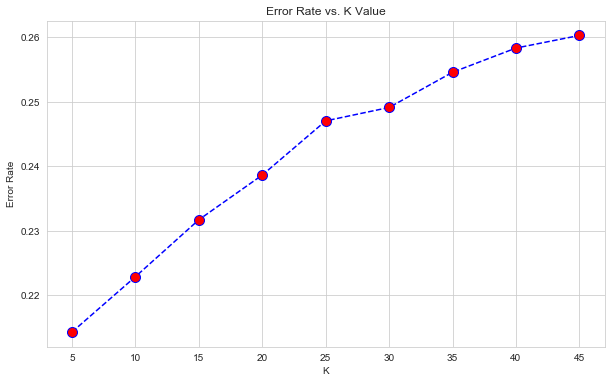

In [79]:
###Run knn with multiple values of k with ball_tree

error_rate = []
AUC = []
precision = []
recall = []

for k in range(5,50, 5):
    knn = KNeighborsClassifier(n_neighbors = k,
                              algorithm = "ball_tree")
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))
    AUC.append(roc_auc_score(y_test, pred_k))
    precision.append(precision_score(y_test, pred_k))
    recall.append(recall_score(y_test, pred_k))

plt.figure(figsize=(10,6))
plt.plot(range(5,50, 5),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'AUC')

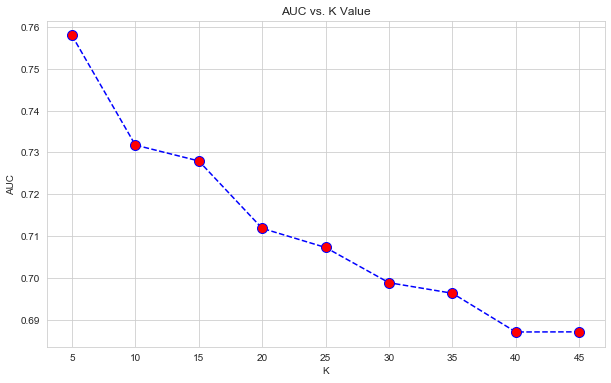

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(5,50, 5), AUC, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('AUC vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC')

Text(0, 0.5, 'Precision')

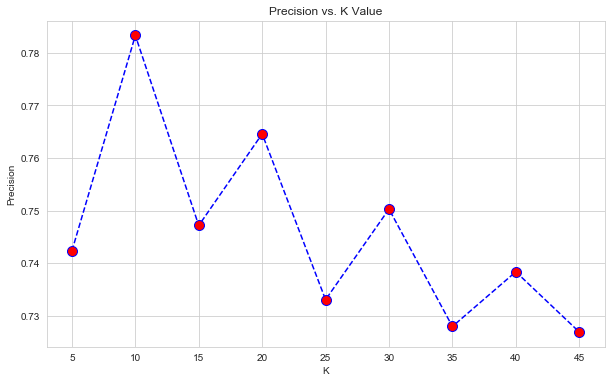

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(5,50, 5), precision, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Precision vs. K Value')
plt.xlabel('K')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

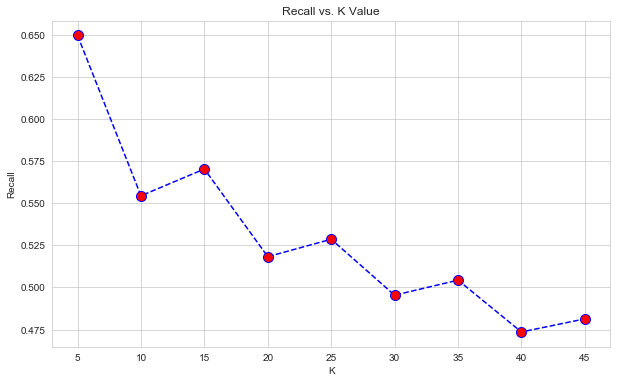

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(5,50, 5), recall, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')

Text(0, 0.5, 'Error Rate')

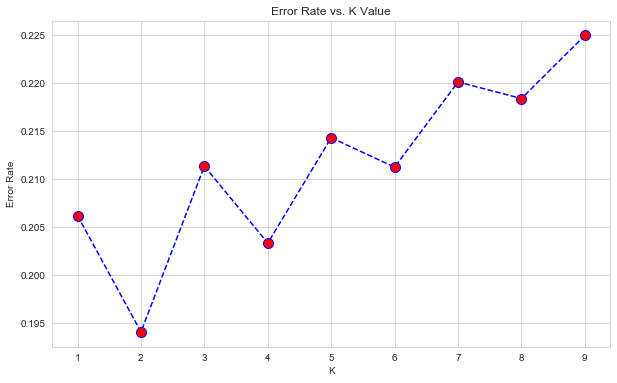

In [83]:
###Run knn with multiple values of k with ball_tree algorithim

error_rate = []
AUC = []
precision = []
recall = []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k,
                              algorithm = "ball_tree")
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))
    AUC.append(roc_auc_score(y_test, pred_k))
    precision.append(precision_score(y_test, pred_k))
    recall.append(recall_score(y_test, pred_k))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'AUC')

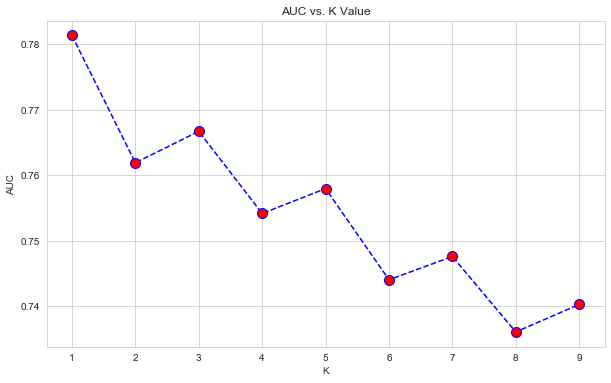

In [84]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), AUC, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('AUC vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC')

Text(0, 0.5, 'Precision')

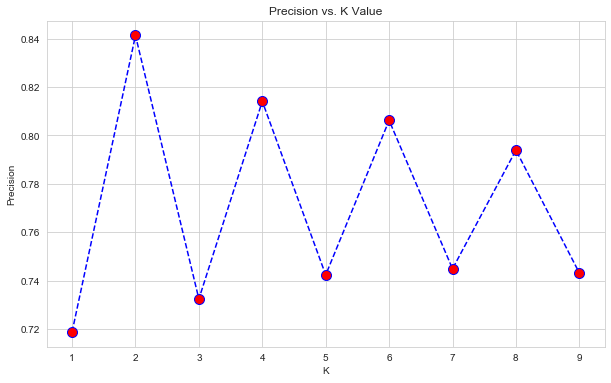

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), precision, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Precision vs. K Value')
plt.xlabel('K')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

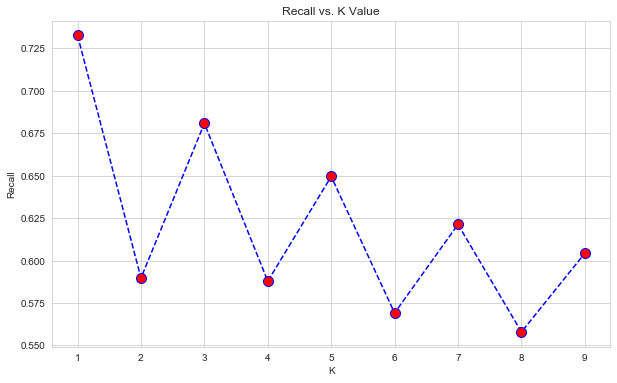

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), recall, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')

In [93]:
###Run knn with multiple values of k using kd_tree

error_rate = []
AUC = []
precision = []
recall = []

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = k,
                              algorithm = "kd_tree")
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))
    AUC.append(roc_auc_score(y_test, pred_k))
    precision.append(precision_score(y_test, pred_k))
    recall.append(recall_score(y_test, pred_k))

Text(0, 0.5, 'Error Rate')

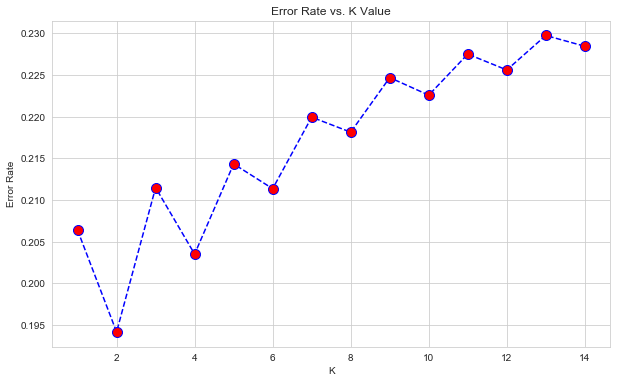

In [97]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'AUC')

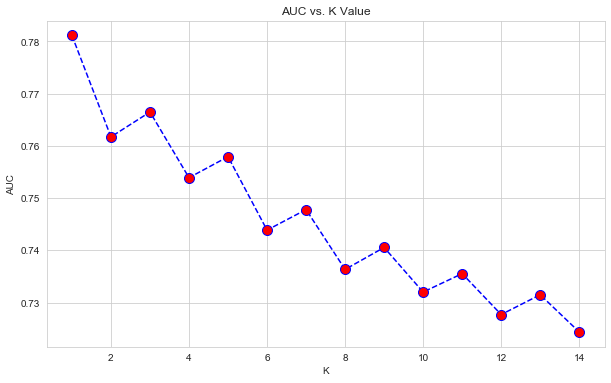

In [94]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),AUC,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('AUC vs. K Value')
plt.xlabel('K')
plt.ylabel('AUC')

Text(0, 0.5, 'Precision')

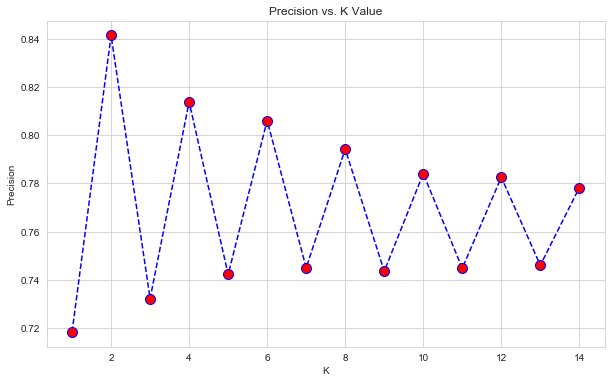

In [95]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),precision,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Precision vs. K Value')
plt.xlabel('K')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

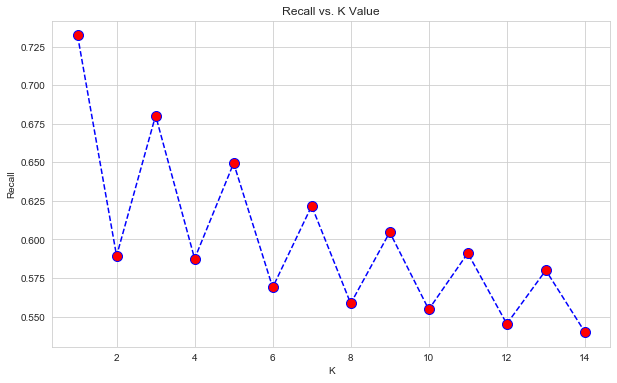

In [96]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),recall,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Recall vs. K Value')
plt.xlabel('K')
plt.ylabel('Recall')

For this question, I will maximize precision is most important because it is more important for a hotel not to overbook and then lose business than it is for the hotel to detect all potential cancellations. Based on that, we will use kNN with k = 2 and the kd_tree algorithm, which was faster.

## SVM Optimization

In [30]:
SVM_parameters = {'C' : [0.1, 0.5, 1, 5, 10, 50],
                 'gamma' : ['auto', 'scale'],
                 'kernel' : [ 'linear', 'rbf', 'poly', 'sigmoid']}
SVM_model = SVC()
random_search = RandomizedSearchCV(estimator = SVM_model,
                                  param_distributions = SVM_parameters,
                                  n_iter = 20,
                                  scoring = 'f1',
                                  cv = 5)
random_search.fit(X_train, y_train)

/Users/PhilCo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/PhilCo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/PhilCo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/PhilCo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/PhilCo/anaconda3/lib/python3.7/site-packages/skle

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'C': [0.1, 0.5, 1, 5, 10, 50],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [39]:
random_search.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 0.5}

In [53]:
SVM_model = SVC(gamma = "scale", kernel = "linear", C = 0.5, random_state = 12345)

In [54]:
SVM_model.fit(X_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=12345, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
predictions = SVM_model.predict(X_test)
AUC = roc_auc_score(predictions, y_test)
precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)

In [59]:
print('AUC: %.3f' % AUC)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)

AUC: 1.000
Precision: 1.000
Recall: 1.000


In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24738
           1       1.00      1.00      1.00     14660

    accuracy                           1.00     39398
   macro avg       1.00      1.00      1.00     39398
weighted avg       1.00      1.00      1.00     39398



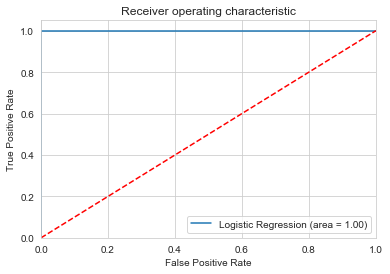

In [70]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
help(SVM_model)

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  oth

In [77]:
print(SVM_model.coef_)

[[-2.00158720e-03  7.55462837e-06 -1.51919354e-03 -6.70267320e-03
   1.48484665e-03 -2.66174118e-04 -9.87099114e-04 -2.32498081e-04
   2.49536776e-02  2.71572055e-02  0.00000000e+00 -3.29369605e-04
   7.00486154e-04 -3.82437685e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.06620974e-03 -1.06620974e-03  0.00000000e+00
   6.43929354e-15  0.00000000e+00  6.43929354e-15  5.41039093e-05
   0.00000000e+00 -2.83019346e-04  3.27311266e+00]]


In [78]:
print(X_train.columns)

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')


                                                  0          1   \
0                                              hotel  lead_time   
1  [-0.002001587203490196, 7.5546283682115245e-06...       None   

                  2                   3                         4   \
0  arrival_date_year  arrival_date_month  arrival_date_week_number   
1               None                None                      None   

                          5                        6                     7   \
0  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights   
1                       None                     None                  None   

       8         9   ...                  17                  18  \
0  adults  children  ...  reserved_room_type  assigned_room_type   
1    None      None  ...                None                None   

                19            20                    21             22    23  \
0  booking_changes  deposit_type  days_in_waiting_list  customer_

list

KeyError: 'hotel'

(1, 27)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.002002,0.000008,-0.001519,-0.006703,0.001485,-0.000266,-0.000987,-0.000232,0.024954,0.027157,...,-0.001066,-0.001066,0.0,6.439294e-15,0.0,6.439294e-15,0.000054,0.0,-0.000283,3.273113
